# HW2 Project: Energy Consumption Data Analysis
Jie Wang 

penn key: tonyw3

In [7]:
import pandas as pd
data_path = 'midatl_forecast_load_mw_hourly_averaged_integer.csv'

energy_data = pd.read_csv(data_path)



In [8]:
# Convert the 'date' and 'hour' columns into a datetime format for the time series
energy_data['datetime'] = pd.to_datetime(energy_data['date']) + pd.to_timedelta(energy_data['hour'], unit='h')

# Set the datetime column as the index
energy_data.set_index('datetime', inplace=True)

# Drop the original 'date' and 'hour' columns, as they are now redundant
energy_data.drop(columns=['date', 'hour'], inplace=True)

# Display the first few rows after conversion
energy_data.head()


,forecast_load_mw
datetime,
2024-01-01 00:00:00,27032
2024-01-01 01:00:00,26262
2024-01-01 02:00:00,25874
2024-01-01 03:00:00,25731
2024-01-01 04:00:00,25827


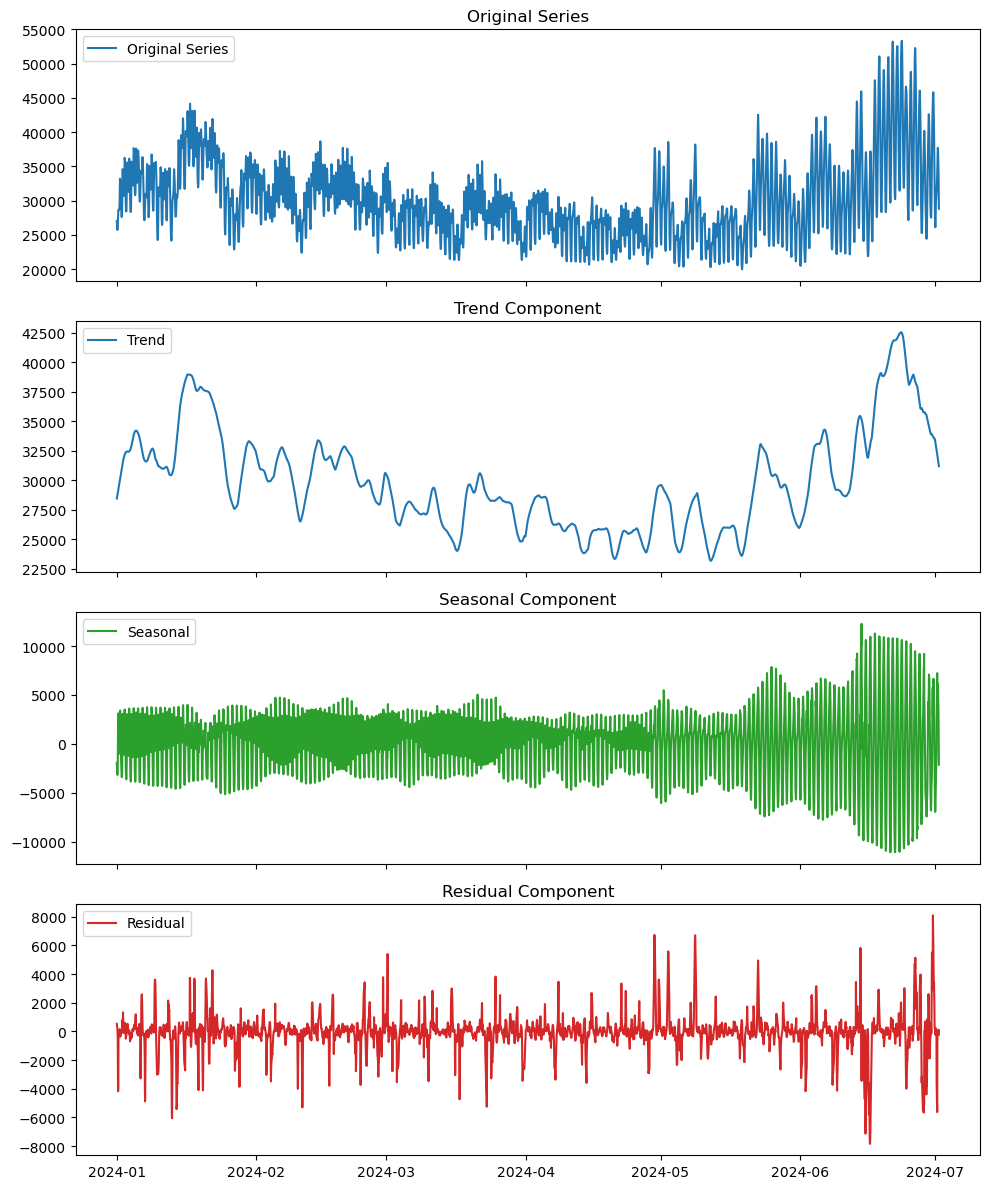

In [9]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL

# Perform STL decomposition focusing on daily periodicity (24-hour cycle)
stl = STL(energy_data['forecast_load_mw'], period=24, robust=True)
stl_result = stl.fit()

# Plot the decomposed components: Trend, Seasonal, and Residual
fig, axes = plt.subplots(4, 1, figsize=(10, 12), sharex=True)

axes[0].plot(energy_data.index, energy_data['forecast_load_mw'], label='Original Series')
axes[0].set_title('Original Series')
axes[0].legend()

axes[1].plot(energy_data.index, stl_result.trend, label='Trend', color='tab:blue')
axes[1].set_title('Trend Component')
axes[1].legend()

axes[2].plot(energy_data.index, stl_result.seasonal, label='Seasonal', color='tab:green')
axes[2].set_title('Seasonal Component')
axes[2].legend()

axes[3].plot(energy_data.index, stl_result.resid, label='Residual', color='tab:red')
axes[3].set_title('Residual Component')
axes[3].legend()

plt.tight_layout()
plt.show()


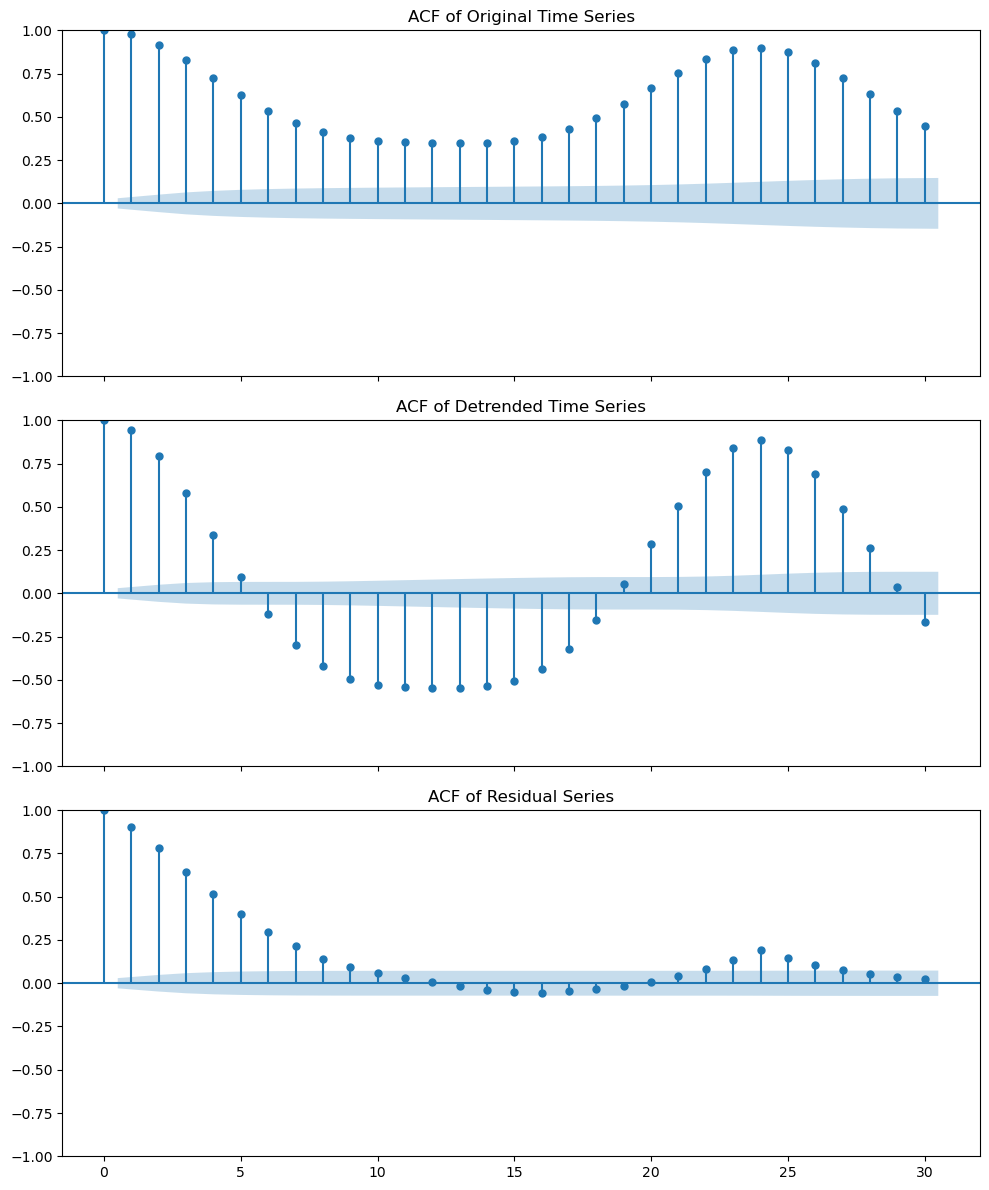

In [10]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot ACF for original, detrended, and residual series
fig, axes = plt.subplots(3, 1, figsize=(10, 12), sharex=True)

# Original time series ACF
plot_acf(energy_data['forecast_load_mw'], lags=30, ax=axes[0])
axes[0].set_title('ACF of Original Time Series')

# Detrended time series (original - trend) ACF
detrended = energy_data['forecast_load_mw'] - stl_result.trend
plot_acf(detrended.dropna(), lags=30, ax=axes[1])
axes[1].set_title('ACF of Detrended Time Series')

# Residual time series ACF
plot_acf(stl_result.resid.dropna(), lags=30, ax=axes[2])
axes[2].set_title('ACF of Residual Series')

plt.tight_layout()
plt.show()


In [11]:
from statsmodels.stats.diagnostic import acorr_ljungbox

# Perform Ljung-Box test on the residuals from STL decomposition
ljung_box_results = acorr_ljungbox(stl_result.resid.dropna(), lags=30, return_df=True)

# Display the Ljung-Box test results
import ace_tools as tools; tools.display_dataframe_to_user(name="Ljung-Box Test Results", dataframe=ljung_box_results)


ModuleNotFoundError: No module named 'ace_tools'